# Data Description:

# Source
* This data was extracted from the census bureau database found at
* 
http://www.census.gov/ftp/pub/DES/www/welcome.html

* Donor: Ronny Kohavi and Barry Becker,
*        Data Mining and Visualization
*        Silicon Graphics.
*        e-mail: ronnyk@sgi.com for questions.

# Distribution of Train and Test
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
* 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)

* Duplicate or conflicting instances : 6

# Class Probabilities

* Class probabilities for adult.all file
* Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
* Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
* Extraction was done by Barry Becker from the 1994 Census database.  A set of
*   reasonably clean records was extracted using the following conditions:
*   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))


# Note: Prediction task is to determine whether a person makes over 50K a year.

# Conversion of original data as follows:
* 1. Discretized agrossincome into two ranges with threshold 50,000.
* 2. Convert U.S. to US to avoid periods.
* 3. Convert Unknown to "?"
* 4. Run MLC++ GenCVFiles to generate data,test.


# Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls.
*  These are:
*          1.  A single cell estimate of the population 16+ for each state.
*          2.  Controls for Hispanic Origin by age and sex.
*          3.  Controls by Race, age and sex.


> * We use all three sets of controls in our weighting program and "rake" through
> * them 6 times so that by the end we come back to all the controls we used.

> * The term estimate refers to population totals derived from CPS by creating
> * "weighted tallies" of any specified socio-economic characteristics of the
> * population.

> * People with similar demographic characteristics should have
* similar weights.  There is one important caveat to remember
* about this statement.  That is that since the CPS sample is
* actually a collection of 51 state samples, each with its own
* probability of selection, the statement only applies within
* state.


# Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
# Problem 1:
Prediction task is to determine whether a person makes over 50K a year.
# Problem 2:
Which factors are important
# Problem 3:
Which algorithms are best for this dataset

In [1]:
#####################Import the packages 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline


In [2]:
# Importing the database

In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=col_labels)
test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, names=col_labels)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Clean the data

In [5]:
df = pd.concat([train, test], axis=0)
df['wage_class'] = df['wage_class'].apply(lambda x: 1 if x==' >50K' else 0)
dff=df
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
wage_class        48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 7.2+ MB


In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [9]:
####################REMOVE UNKNOWNS
    
df.replace(' ?', np.nan, inplace=True) ###making copy for visualization

In [10]:
# remove no effect columns

Some of the variables are not self-explanatory. The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents. The variable education_num stands for the number of years of education in total, which is a continuous representation of the discrete variable education. The variable relationship represents the responding unit’s role in the family.  capital_gain and capital_loss are income from investment sources other than wage/salary.

For simplicity of this analysis, the weighting factor is discarded. Total number of years of education can represent by the highest education level completed. Role in the family can be assessed from gender and marital status. Thus, the following 3 variables are deleted education,  relationship, and fnlwgt.

In [11]:
df.drop('relationship',axis=1,inplace=True)
df.drop('fnlwgt',axis=1,inplace=True)
df.drop('education',axis=1,inplace=True)

In [12]:
df.shape

(48842, 12)

In [13]:
#################### Converting to int

In [14]:
df = pd.concat([df, pd.get_dummies(df['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
df.drop('workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['marital_status'],prefix='marital_status',prefix_sep=':')], axis=1)
df.drop('marital_status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
df.drop('occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['race'],prefix='race',prefix_sep=':')], axis=1)
df.drop('race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['sex'],prefix='sex',prefix_sep=':')], axis=1)
df.drop('sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['native_country'],prefix='native_country',prefix_sep=':')], axis=1)
df.drop('native_country',axis=1,inplace=True)


In [15]:
df.shape

(48842, 83)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 83 columns):
age                                           48842 non-null int64
education_num                                 48842 non-null int64
capital_gain                                  48842 non-null int64
capital_loss                                  48842 non-null int64
hours_per_week                                48842 non-null int64
wage_class                                    48842 non-null int64
workclass: Federal-gov                        48842 non-null uint8
workclass: Local-gov                          48842 non-null uint8
workclass: Never-worked                       48842 non-null uint8
workclass: Private                            48842 non-null uint8
workclass: Self-emp-inc                       48842 non-null uint8
workclass: Self-emp-not-inc                   48842 non-null uint8
workclass: State-gov                          48842 non-null uint8
workclass: Without-p

In [17]:
df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,workclass: Private,...,native_country: Portugal,native_country: Puerto-Rico,native_country: Scotland,native_country: South,native_country: Taiwan,native_country: Thailand,native_country: Trinadad&Tobago,native_country: United-States,native_country: Vietnam,native_country: Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
########### Preparing data for Training and testing 

X = np.array(df.drop(['wage_class'], 1))
y = np.array(df['wage_class'])
X = preprocessing.scale(X)
y = np.array(df['wage_class'])


#Splitting data as train and test data 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

C:\Users\disiz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


# ML MODELS DEPLOY....1...2....3.....GO

In [19]:
#########LOGISTIC REGRESSION######################################################

from sklearn.metrics import accuracy_score
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

##########Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))

[[5421 2740]
 [ 188 1420]]
             precision    recall  f1-score   support

          0       0.97      0.66      0.79      8161
          1       0.34      0.88      0.49      1608

avg / total       0.86      0.70      0.74      9769

The Accuracy for Logistic Regression is 0.7002763844815232


In [20]:
################LDA Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics


clf = LinearDiscriminantAnalysis()
clf.fit( X_train, y_train )
tree_predict = clf.predict(X_test)
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
LDA = accuracy_score(y_test, tree_predict)
print("The Accuracy for LDA is {}".format(LDA))

[[7824  337]
 [1132  476]]
             precision    recall  f1-score   support

          0       0.87      0.96      0.91      8161
          1       0.59      0.30      0.39      1608

avg / total       0.83      0.85      0.83      9769

The Accuracy for LDA is 0.8496263691268298


C:\Users\disiz\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [21]:
########################################LINEAR REGRESSION#######################

from sklearn import linear_model
from sklearn.metrics import accuracy_score

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_lmpre = lm.predict(X_test)

ylm = np.around(y_lmpre)

lm.score(X_train, y_train)
lm.coef_
lm.intercept_

##########Results

print(confusion_matrix(y_test,ylm))
print(classification_report(y_test,ylm))

LA = accuracy_score(y_test, ylm)
print("The Accuracy for Linear Regression is {}".format(LA))

[[8070   91]
 [1448  160]]
             precision    recall  f1-score   support

          0       0.85      0.99      0.91      8161
          1       0.64      0.10      0.17      1608

avg / total       0.81      0.84      0.79      9769

The Accuracy for Linear Regression is 0.8424608455317842


In [22]:
############################################## KNN ###############

from sklearn import preprocessing, cross_validation, neighbors
from sklearn.metrics import accuracy_score

clf = neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

knnpre = clf.predict(X_test)

##########Results

print(confusion_matrix(y_test,knnpre))
print(classification_report(y_test,knnpre))
KKNA = accuracy_score(y_test, knnpre)
print("The Accuracy for KNN is {}".format(KKNA))

C:\Users\disiz\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[[7653  508]
 [1103  505]]
             precision    recall  f1-score   support

          0       0.87      0.94      0.90      8161
          1       0.50      0.31      0.39      1608

avg / total       0.81      0.84      0.82      9769

The Accuracy for KNN is 0.8350905926911659


In [23]:
################################ Decision tree ###########################################

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn import metrics

clf_tree = DecisionTreeClassifier( max_depth = 4 )

clf_tree.fit( X_train, y_train )
tree_predict = clf_tree.predict( X_test )
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
DTA = accuracy_score(y_test, tree_predict)
print("The Accuracy for Decision Tree Model is {}".format(DTA))

[[7978  183]
 [1239  369]]
             precision    recall  f1-score   support

          0       0.87      0.98      0.92      8161
          1       0.67      0.23      0.34      1608

avg / total       0.83      0.85      0.82      9769

The Accuracy for Decision Tree Model is 0.8544375063977889


In [24]:
################################ SVM #####################################

from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

svc = SVC(C = 1.0, kernel = "linear" )
svc.fit( X_train, y_train )
svc_predict = svc.predict( X_test )

print(confusion_matrix(y_test,svc_predict))
print(classification_report(y_test,svc_predict))
SVMA = accuracy_score(y_test, svc_predict)
print("The Accuracy for SVM is {}".format(SVMA))

C:\Users\disiz\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[[8141   20]
 [1579   29]]
             precision    recall  f1-score   support

          0       0.84      1.00      0.91      8161
          1       0.59      0.02      0.04      1608

avg / total       0.80      0.84      0.77      9769

The Accuracy for SVM is 0.8363189681646023


In [25]:
####################### NAIVE  #####################################

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Output 
naive_pre= model.predict(X_test)
print (naive_pre)
##result
print(confusion_matrix(y_test,naive_pre))
print(classification_report(y_test,naive_pre))
NBA = accuracy_score(y_test, naive_pre)
print("The Accuracy for NB is {}".format(NBA))

[1 1 1 ... 1 0 1]
[[ 668 7493]
 [  36 1572]]
             precision    recall  f1-score   support

          0       0.95      0.08      0.15      8161
          1       0.17      0.98      0.29      1608

avg / total       0.82      0.23      0.17      9769

The Accuracy for NB is 0.22929675504145766


In [26]:
########################### KMEANS ###################################

from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X_train) 
labels = k_means.labels_
centroids  = k_means.cluster_centers_.squeeze()
labelspre = k_means.predict(X_test)
print(confusion_matrix(y_test,labelspre))
print(classification_report(y_test,labelspre))
KmeanA = accuracy_score(y_test, labelspre)
print("The Accuracy for kmeans is {}".format(KmeanA))

[[5128 3033]
 [1365  243]]
             precision    recall  f1-score   support

          0       0.79      0.63      0.70      8161
          1       0.07      0.15      0.10      1608

avg / total       0.67      0.55      0.60      9769

The Accuracy for kmeans is 0.5498003889855666


Best: -0.292956 using {'learning_rate': 0.3}
-0.687347 (0.000053) with: {'learning_rate': 0.0001}
-0.639894 (0.000486) with: {'learning_rate': 0.001}
-0.412262 (0.002780) with: {'learning_rate': 0.01}
-0.298828 (0.003773) with: {'learning_rate': 0.1}
-0.296188 (0.004063) with: {'learning_rate': 0.2}
-0.292956 (0.004255) with: {'learning_rate': 0.3}


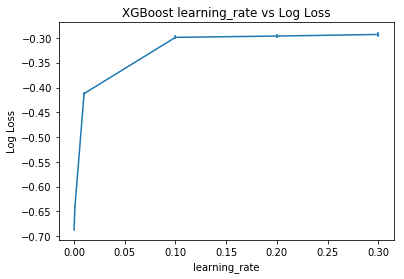

In [27]:
#######################XGB experiementing with learning rate
#This code is to let algorithm figure out itself, which value for learning rate is best 

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


 

from matplotlib import pyplot
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')


In [29]:
############# XGboost - Picking the best values for learning rate and estimators  

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))

C:\Users\disiz\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


training set auc: 0.8623195823523391
test set auc: 0.8623195823523391
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}
The Accuracy  is 0.8623195823523391


C:\Users\disiz\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [30]:
#As you can see the max accuracy is achieved with XgBoost. 

In [31]:
print("End of assignment")

End of assignment
